<div style ="font-family:Trebuchet MS; background-color : #f8f0fa; border-left: 5px solid #1b4332; padding: 12px; border-radius: 50px 50px;">
    <h2 style="color: #1b4332; font-size: 48px; text-align: center;">
        <b>Step 6 in Feature Engineering:Dimensionality Reduction</b>
        <hr style="border-top: 2px solid #264653;">
    </h2>
    <h3 style="font-size: 14px; color: #264653; text-align: left; "><strong> I hope this is very helpful. let's started </strong></h3>
</div>

### **Introduction**

Dimensionality reduction is the process of reducing the number of features in a dataset while preserving as much information as possible. It helps in improving model performance, reducing overfitting, and simplifying visualization. Below are three popular techniques for dimensionality reduction:

- we will practice along with the [Software Defects dataset](https://www.kaggle.com/competitions/playground-series-s3e23/data)

![alt text](1_S7bpbLCiMZA7-5cMSHLhCg.webp)

It’s not feasible to analyze each and every dimensions at a microscopic level in a high dimensional data. It might take us days or months to perform any meaningful analysis which requires lot of time, money and manpower in our business which is not often encouraged. Training a data with high dimensions will lead us problems like:

- Space required to store the data gets increased with increasing dimensions.
- Less dimensions will take low time complexity in training a model.
- As dimensions increases, the possibility of overfitting the model also gets increased.
- we cannot visualize a high dimensional data. By dimensionality reduction we will reduce the data to 2D or 3D for better visualization.
- It will remove all the correlated features in our data.

## **1. Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a technique that transforms the original features into a smaller set of uncorrelated components, called principal components. These components capture the maximum variance in the data.

### **Steps:**

- **Standardize the Data:** PCA is sensitive to the scale of the features, so it's important to standardize the data.

- **Compute Covariance Matrix:** Calculate the covariance matrix to understand how the variables vary together.

- **Calculate Eigenvectors and Eigenvalues:** These help in understanding the directions and magnitude of the variance.

- **Select Principal Components:** Choose the top components that capture the most variance.

- **Transform Data:** Project the original data onto the selected components.

In [30]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('..\Data\SoftwarDefects.csv')
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [31]:
# let's scale the data such that each feature has a single unit of variance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# apply PCA to reduce the number of features
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
print(df_pca.shape)


(101763, 2)


<Figure size 1000x1000 with 0 Axes>

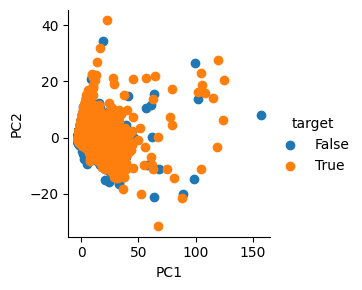

In [36]:
#create the dataframe with the PCA

df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

target = df['defects']
df_pca['target'] = target.values

# plot the data
plt.figure(figsize=(10, 10))
sns.FacetGrid(df_pca, hue= 'target').map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()

Advantages :

- It removes correlated features.
- Improves model efficiency.
- Reduces overfitting.
- Improves Visualization.

Disadvantages :

- PCA is a linear algorithm and it won’t work very well for polynomial or other complex functions. We can some how use kernel PCA for such data.
- After PCA we may loose lot of information if we won’t choose the right number of dimensions to get eliminated.
- less interpretability, since the original features transforms to principal components which are not as readable as original features.
- It preserves global shapes rather than local shapes.

### **2. Linear Discriminant Analysis (LDA)**

Linear Discriminant Analysis (LDA) is a technique used for dimensionality reduction while maximizing class separability. Unlike PCA, LDA is a supervised method that considers class labels.

The goal of this algorithm is to project a dataset to a lower dimensional space with a separability of the categories in order to avoid overfitting and to reduce the computational power of the machines.

#### **Steps:**

- **Standardize the Data:** Like PCA, LDA requires standardized data.

- **Compute the Scatter Matrices:** Calculate the within-class and between-class scatter matrices.

- **Solve the Generalized Eigenvalue Problem:** This will give you the linear discriminants.

- **Select Linear Discriminants:** Choose the top discriminants that separate the classes the most.

- **Transform Data:** Project the original data onto the selected discriminants.

In [51]:
#let's practice with the iris dataset from sklearn
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
# print the shape of the data
print(iris.data.shape)

# print the target values
print(np.unique(iris.target))

print(iris.feature_names)

(150, 4)
[0 1 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<Figure size 1000x1000 with 0 Axes>

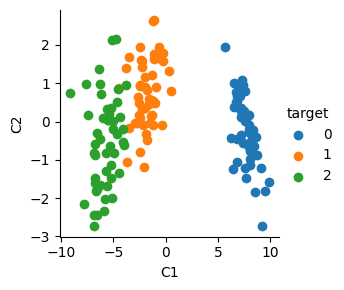

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda = lda.fit_transform(iris.data, iris.target)

# convert the data to a dataframe
df_lda = pd.DataFrame(data=X_lda, columns=['C1', 'C2'])
df_lda['target'] = iris.target

# plot the data
plt.figure(figsize=(10, 10))
sns.FacetGrid(df_lda, hue='target').map(plt.scatter, 'C1', 'C2').add_legend()
plt.show()


### **3. T-Distributed Stochastic Neighborhood Embedding(T-SNE)**

T-SNE is a machine learning algorithm often used for visualization, It is a non-linear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

T-SNE has been used for visualization in a wide range of applications, including computer security research, music analysis, cancer research, bioinformatics, and biomedical signal processing.It is often used to visualize high-level representations learned by an artificial neural network.


Advantages:

- Unlike PCA, T-SNE is a non-linear reduction technique that means it works well with any polynomial or non linear data.
- T-SNE is a capable to preserve local and global structures while PCA tries to project High D to low D that explains most of the variance in the data. Hence it only cares about global structures.
- T-SNE is widely used in visualization tasks.

Disadvantages:

- T-SNE has a quadratic time and space complexity because we are finding similarity between points with every other points in the data (order of 0(N²)). Which is huge especially when we have time and memory constraints.
- It is not recommended to use T-SNE while working with large datasets.
- T-SNE is a non-parametric mapping method that means it doesn’t have explicit function that maps the given point to a low dimensional space. T-SNE embeds the points into low dimensions based on the neighbourhood of that point. So when a test data point comes, as it is not present before, we need to train the whole T-SNE algorithm again for embedding which is rarely used because of it’s quadratic time-complexity.

d:\08.project\13.full data science roadmap\Data-Scienc-Roadmap-from-zero-to-hero\.venvRoadmap\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

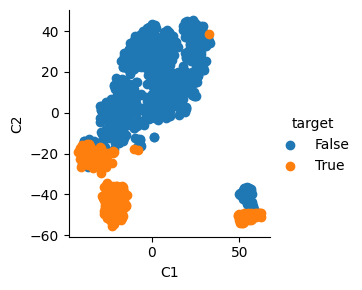

In [56]:
from sklearn.manifold import TSNE

df = pd.read_csv('..\Data\SoftwarDefects.csv')
df_1000 = df.sample(n=1000, random_state=1)
labels = df_1000['defects']

# first we need to scale the data

scaler = StandardScaler()
df_1000_scaled = scaler.fit_transform(df_1000)

# apply t-SNE to reduce the number of features
tsne = TSNE(n_components=2, random_state=1, perplexity=30, n_iter=5000, learning_rate=1000)
df_tsne = tsne.fit_transform(df_1000_scaled)

# convert the data to a dataframe
df_tsne = pd.DataFrame(data=df_tsne, columns=['C1', 'C2'])
df_tsne['target'] = labels.values

# plot the data
plt.figure(figsize=(10, 10))
sns.FacetGrid(df_tsne, hue='target').map(plt.scatter, 'C1', 'C2').add_legend()
plt.show()

#### **Conclusion**

- PCA is useful for reducing dimensionality by transforming features into a smaller set of uncorrelated components.
- LDA is best when you want to reduce dimensionality while keeping the class separability intact.
- t-SNE is excellent for visualizing high-dimensional data in 2D or 3D space, capturing local structure effectively.


Dealing with thousands and millions of features is a must-have skill for any data scientist. The amount of data we are generating each day is unprecedented and we need to find different ways to figure out how to use it. Dimensionality reduction is a very useful way to do this and has worked wonders for me, both in a professional setting as well as in machine learning hackathons.

Also dimensionality reduction may not work very well in all situations. In such cases we need to think out of the box to transform the data into lower dimensional space, also it is important to work with different new reduction algorithms on the same data.